# mini_project_1.ipynb

This mini project works with data from the official F1 website: formula1.com<br>
<br>
In the notebook **read_from_formula1_website.ipynb** results from all races from 1950 to 2024<br>
are read from the website and stored as html files in a directory called "html".<br>
<br>
Functionality for reading from the website and storing as html files is in the module **f1_reader.py**<br>
This module also contain functionality for reading the results from the html files into pandas data frames.<br>

In [1]:
import pandas as pd
import f1_reader

First results from all F1 races from 1950 to 2024 is loaded into the variable `results`.<br>
`results` is a dictionary with key: `year` and value: `season`<br>
Each `season` is a dictionary with key: `race_no` and value: data frame with race result.<br>

In [2]:
directory = "html"

results = {}
for year in range(2020, 2025):
    results[year] = f1_reader.read_f1_season_from_html_files_to_dictionary(year, directory)

Here is how a race result is accessed:<br>
`results[year][race_no]` -> data frame with race result<br>

As an example is here shown the race result from the 6'th race of the 2024 season:

In [3]:
results[2024][6]

,POS.,NO.,DRIVER,TEAM,LAPS,TIME / RETIRED,PTS.
0,1,4,Lando Norris NOR,McLaren Mercedes,57,1:30:49.876,25
1,2,1,Max Verstappen VER,Red Bull Racing Honda RBPT,57,+7.612s,18
2,3,16,Charles Leclerc LEC,Ferrari,57,+9.920s,15
3,4,11,Sergio Perez PER,Red Bull Racing Honda RBPT,57,+14.650s,12
4,5,55,Carlos Sainz SAI,Ferrari,57,+16.407s,10
5,6,44,Lewis Hamilton HAM,Mercedes,57,+16.585s,8
6,7,22,Yuki Tsunoda TSU,RB Honda RBPT,57,+26.185s,6
7,8,63,George Russell RUS,Mercedes,57,+34.789s,4
8,9,14,Fernando Alonso ALO,Aston Martin Aramco Mercedes,57,+37.107s,2
9,10,31,Esteban Ocon OCO,Alpine Renault,57,+39.746s,1


The data frames also contains metadata:
- Race title
- Race note (if any)

In [4]:
results[2024][6].attrs

{'race_title': 'FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024',
 'race_note': 'Magnussen received a 10-second time penalty for causing a collision and a 20-second time penalty for entering the pits during a Safety Car period and not changing tyres. Stroll received a 10-second time penalty for leaving the track and gaining an advantage. Sainz received a five-second time penalty for causing a collision.'}

Now number of races per season is explored.
From `results` is generated a pandas series `races_per_season` with this information.

In [5]:
races_per_season = {year: len(season) for year, season in results.items()}
races_per_season = pd.Series(races_per_season)
print(races_per_season)

2020    17
2021    22
2022    22
2023    22
2024    24
dtype: int64


`races_per_season` is now plotted as a bar chart, so the information can be explored visually:

<Axes: title={'center': 'Races per season'}, xlabel='Season', ylabel='Number of races'>

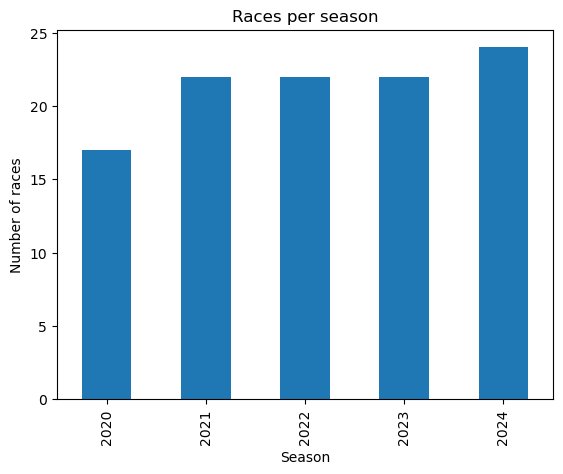

In [6]:
races_per_season.plot(kind="bar", title="Races per season", xlabel="Season", ylabel="Number of races")